In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.models.kde_copula_nn_pdf import KDECopulaNNPdf

In [3]:
from src.models.kde_utils import kde_smooth_peaks_1dim, kde_smooth_peaks
from src.models.kde_copula_nn_pdf import KDECopulaNNPdf


In [4]:
%matplotlib inline

In [5]:
# sec example dataset with correlations
df = pd.read_csv('comparisons.csv.gz')

In [6]:
pf = df.query("norm_cossimw >=0.1 and norm_cossimn>=0.1")
data = pf[['norm_cossimw', 'norm_cossimn', 'norm_jaro', 'norm_ed']][pf.diff_category=='unknown'].values.copy()

In [7]:
# ranges for pdf normalization
# none means set autimatically.
x_min = [0] * 4
x_max = [1.] * 4
x_min[0] = 0.1
x_min[1] = 0.1
x_max[3] = None


In [8]:
kde = KDECopulaNNPdf(x_min=x_min, x_max=x_max, rho=0.3)


In [9]:
kde = kde.fit(data)

Transforming variables.
Fitting and calibrating classifier.
Model = rho: 0.3, number of selected non-linear variables: 4


(array([  1.,   0.,   1.,   0.,   0.,   3.,   0.,   4.,   1.,   3.,  10.,
         10.,  25.,  36.,  53.,  77., 110., 150., 200., 266., 332., 412.,
        494., 572., 651., 715., 773., 797., 812., 801., 768., 718., 650.,
        572., 489., 411., 331., 264., 201., 149., 108.,  81.,  53.,  33.,
         20.,  19.,  10.,   6.,   2.,   1.]),
 array([-4.76341056, -4.59623532, -4.42906008, -4.26188484, -4.0947096 ,
        -3.92753436, -3.76035912, -3.59318388, -3.42600864, -3.25883339,
        -3.09165815, -2.92448291, -2.75730767, -2.59013243, -2.42295719,
        -2.25578195, -2.08860671, -1.92143147, -1.75425623, -1.58708099,
        -1.41990575, -1.25273051, -1.08555527, -0.91838003, -0.75120478,
        -0.58402954, -0.4168543 , -0.24967906, -0.08250382,  0.08467142,
         0.25184666,  0.4190219 ,  0.58619714,  0.75337238,  0.92054762,
         1.08772286,  1.2548981 ,  1.42207334,  1.58924858,  1.75642383,
         1.92359907,  2.09077431,  2.25794955,  2.42512479,  2.59230003,
 

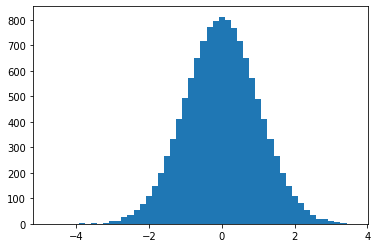

In [10]:
X_g = kde.pipe_[0].transform(data)
plt.hist(X_g[:, 1], bins=50)

(array([  2.,   5.,  11.,  23.,  32.,  55., 102., 106., 126., 196., 258.,
        265., 343., 390., 470., 484., 547., 599., 566., 552., 566., 549.,
        583., 551., 566., 529., 486., 459., 475., 391., 393., 254., 265.,
        198., 164., 158., 115., 100.,  55.,  51.,  41.,  36.,  25.,  29.,
          6.,   8.,   4.,   4.,   1.,   1.]),
 array([-4.36820897, -4.16938175, -3.97055454, -3.77172732, -3.5729001 ,
        -3.37407288, -3.17524567, -2.97641845, -2.77759123, -2.57876402,
        -2.3799368 , -2.18110958, -1.98228237, -1.78345515, -1.58462793,
        -1.38580072, -1.1869735 , -0.98814628, -0.78931907, -0.59049185,
        -0.39166463, -0.19283742,  0.0059898 ,  0.20481702,  0.40364424,
         0.60247145,  0.80129867,  1.00012589,  1.1989531 ,  1.39778032,
         1.59660754,  1.79543475,  1.99426197,  2.19308919,  2.3919164 ,
         2.59074362,  2.78957084,  2.98839805,  3.18722527,  3.38605249,
         3.5848797 ,  3.78370692,  3.98253414,  4.18136136,  4.38018857,
 

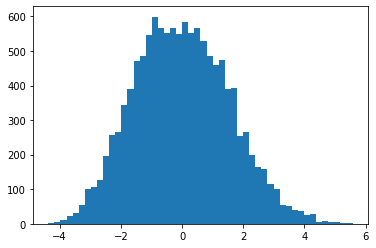

In [11]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 0], bins=50)

(array([243., 244., 244., 244., 245., 242., 245., 244., 244., 245., 240.,
        247., 245., 243., 242., 245., 242., 243., 250., 241., 244., 241.,
        242., 250., 245., 241., 247., 244., 242., 241., 245., 244., 246.,
        247., 241., 243., 244., 247., 240., 243., 246., 246., 243., 242.,
        243., 245., 244., 245., 242., 244.]),
 array([3.02619274e-07, 2.00002966e-02, 4.00002905e-02, 6.00002845e-02,
        8.00002784e-02, 1.00000272e-01, 1.20000266e-01, 1.40000260e-01,
        1.60000254e-01, 1.80000248e-01, 2.00000242e-01, 2.20000236e-01,
        2.40000230e-01, 2.60000224e-01, 2.80000218e-01, 3.00000212e-01,
        3.20000206e-01, 3.40000200e-01, 3.60000194e-01, 3.80000188e-01,
        4.00000182e-01, 4.20000176e-01, 4.40000169e-01, 4.60000163e-01,
        4.80000157e-01, 5.00000151e-01, 5.20000145e-01, 5.40000139e-01,
        5.60000133e-01, 5.80000127e-01, 6.00000121e-01, 6.20000115e-01,
        6.40000109e-01, 6.60000103e-01, 6.80000097e-01, 7.00000091e-01,
        7.

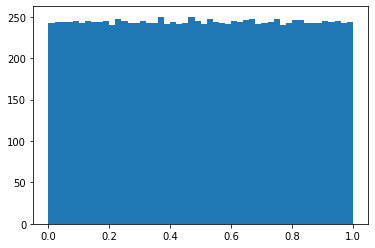

In [12]:
X_u = kde.pipe_.transform(data)
plt.hist(X_u[:, 1], bins=50)

In [13]:
# after transformations: pca and uniform datasets
pf = pd.DataFrame(X_p)
df = pd.DataFrame(X_u)

In [14]:
import phik

In [15]:
pf.corr()

,0,1,2,3
0,1.000000e+00,5.977439e-17,-1.681469e-16,8.558577e-16
1,5.977439e-17,1.000000e+00,9.711560e-16,3.265045e-17
2,-1.681469e-16,9.711560e-16,1.000000e+00,-3.705876e-16
3,8.558577e-16,3.265045e-17,-3.705876e-16,1.000000e+00


In [16]:
pf.phik_matrix()

interval columns not set, guessing: [0, 1, 2, 3]


,0,1,2,3
0,1.000000,0.145246,0.150999,0.176263
1,0.145246,1.000000,0.309976,0.203319
2,0.150999,0.309976,1.000000,0.209903
3,0.176263,0.203319,0.209903,1.000000


In [17]:
df.corr()

,0,1,2,3
0,1.000000,0.015417,0.009816,0.021113
1,0.015417,1.000000,-0.007192,0.020426
2,0.009816,-0.007192,1.000000,-0.016926
3,0.021113,0.020426,-0.016926,1.000000


In [18]:
df.phik_matrix()

interval columns not set, guessing: [0, 1, 2, 3]


,0,1,2,3
0,1.000000,0.125983,0.102540,0.165472
1,0.125983,1.000000,0.154892,0.200760
2,0.102540,0.154892,1.000000,0.202403
3,0.165472,0.200760,0.202403,1.000000


In [19]:
df.significance_matrix()

interval columns not set, guessing: [0, 1, 2, 3]


,0,1,2,3
0,235.640201,8.703052,6.214669,13.266299
1,8.703052,235.636999,11.727177,17.684670
2,6.214669,11.727177,235.655891,16.509603
3,13.266299,17.684670,16.509603,235.654970


In [20]:
# use mutual information to capture residual levels of non-linearity
from sklearn.feature_selection import mutual_info_regression
mi = np.zeros((4, 4))
for i in range(4):
    mi[i, :] = mutual_info_regression(X_u, X_u[:, i])

mi

array([[8.15262264, 0.05980586, 0.06518818, 0.10597003],
       [0.05980671, 8.15259531, 0.06154273, 0.0748265 ],
       [0.06518818, 0.06154426, 8.15262264, 0.07339429],
       [0.10597003, 0.0748265 , 0.07339429, 8.15262264]])

In [21]:
X_gen, sample_weight = kde.sample(200000)

In [22]:
sum(sample_weight)

202808.34949669748

(array([5.2830e+03, 1.3128e+04, 2.7195e+04, 3.9916e+04, 3.4722e+04,
        3.0702e+04, 2.1706e+04, 1.1451e+04, 6.2150e+03, 3.5350e+03,
        2.0680e+03, 1.2400e+03, 8.4200e+02, 5.4000e+02, 3.0400e+02,
        1.6100e+02, 1.3900e+02, 1.2600e+02, 1.2400e+02, 9.9000e+01,
        8.0000e+01, 7.5000e+01, 5.1000e+01, 5.1000e+01, 3.9000e+01,
        4.9000e+01, 2.9000e+01, 3.1000e+01, 1.4000e+01, 1.3000e+01,
        1.3000e+01, 6.0000e+00, 8.0000e+00, 4.0000e+00, 6.0000e+00,
        1.0000e+00, 1.0000e+00, 8.0000e+00, 6.0000e+00, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.10389772, 0.29534248, 0.48678724, 0.678232  , 0.86967676,
        1.06112153, 1.25256629, 1.44401105, 1.63545581, 1.82690057,
        2.01834534, 2.2097901 , 2.40123486, 2.59267962, 2.78412438,
        2.97556915, 3.16701391, 3.35845867, 3.54990343, 3.74134819,
        3.93279296, 4.12423772, 4.31568248, 4.

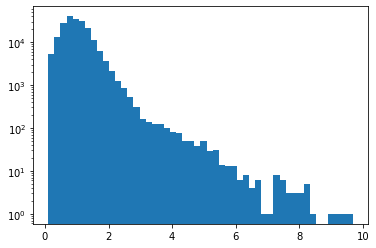

In [23]:
plt.hist(sample_weight, bins=50, log=True)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.88560886, 1.0496105 , 1.05371054, 1.11931119, 1.48831488,
        1.59901599, 1.68511685, 1.78351784, 1.94751948, 2.03772038,
        2.16482165, 1.88191882, 2.17712177, 2.08282083, 1.79581796,
        1.61131611, 1.66051661, 1.58671587, 1.6400164 , 1.57851579,
        1.63591636, 1.54571546, 1.35301353, 1.4596146 , 1.43091431,
        1.2300123 , 1.04141041, 1.04141041, 0.97580976, 1.15211152,
        0.73800738, 0.72570726, 0.50840508, 0.54940549, 0.54940549,
        0.42230422, 0.27880279, 0.1599016 , 0.1804018 , 0.0902009 ,
        0.04100041, 0.02050021, 0.02460025, 0.01230012, 0.00410004]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

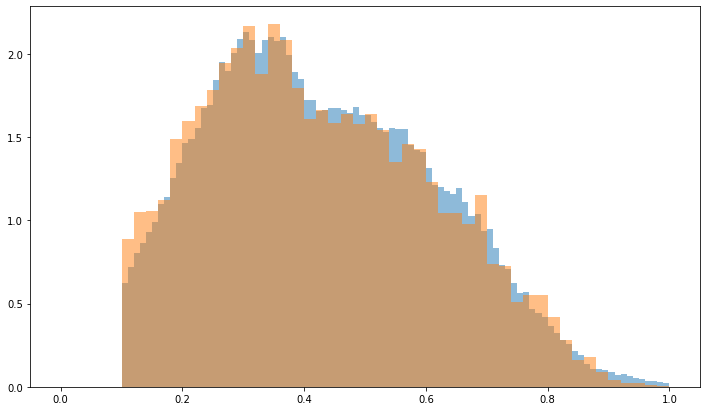

In [24]:
i=1
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(0,1), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=50, range=(0,1), density=True, alpha=0.5)

(array([0.00000000e+00, 2.66524520e-03, 9.18484501e-03, 1.67705429e-02,
        3.88715762e-02, 6.11776283e-02, 6.46629490e-02, 6.08085944e-02,
        5.65442021e-02, 4.51451534e-02, 3.36230933e-02, 2.78415614e-02,
        2.02148598e-02, 1.47613580e-02, 1.04559619e-02, 8.85681483e-03,
        5.61751681e-03, 7.87272429e-03, 2.58323766e-03, 2.95227161e-03,
        1.84516976e-03, 1.14810563e-03, 1.68115467e-03, 1.23011317e-03,
        7.79071675e-04, 4.92045268e-04, 3.69033951e-04, 4.92045268e-04,
        2.46022634e-04, 2.87026406e-04, 4.10037723e-05, 8.20075447e-05,
        8.20075447e-05, 8.20075447e-05, 4.10037723e-05, 0.00000000e+00,
        2.05018862e-04, 4.10037723e-05, 4.10037723e-05, 1.23011317e-04,
        4.10037723e-05, 0.00000000e+00, 0.00000000e+00, 4.10037723e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24., 

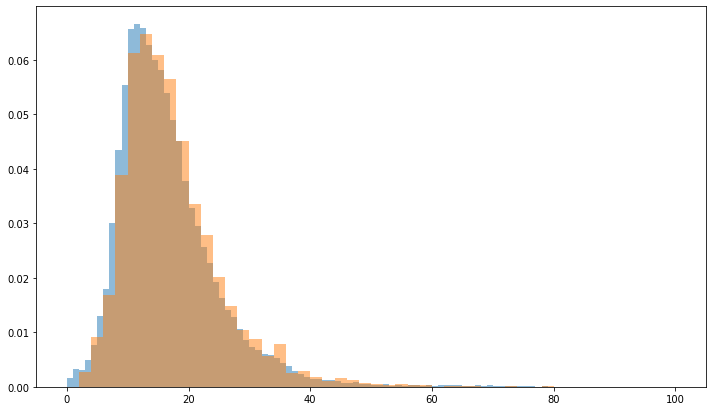

In [25]:
i=3
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(0,100), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=50, range=(0,100), density=True, alpha=0.5)

In [26]:
kde.score(data)

-13765.56911715075

In [27]:
X_gen, sample_weight = kde.sample(12195)

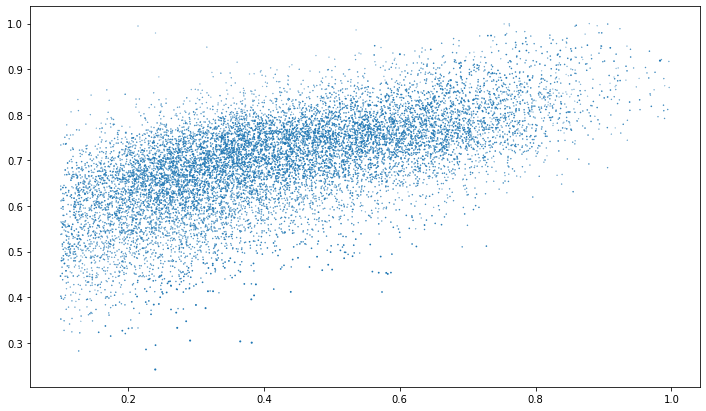

In [30]:
i=1
j=2
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.2*sample_weight)

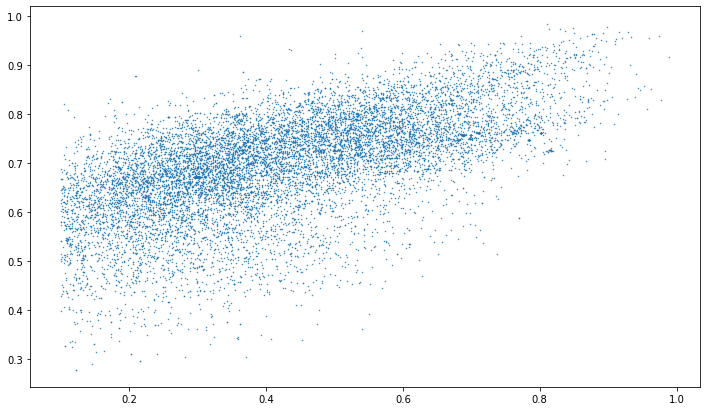

In [31]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,i], data[:,j], s=0.2)